In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


# Force Balance and Bending Moments

In [ ]:
#Define constants
R1y = 35.0 #@ x=0
R1z = 50.0 #@ x=0

B1y =  -845.0/7#@ x=2.50 in
B1z =  -2050.0/7#@ x=2.50 in

W12y = 300 #@ x=7.5 in
W12z = 850 #@ x=7.5 in

B2y =  -1745.0/7 #@9.50 in
B2z =  -4600.0/7 #@9.50 in

R2y = 35.0 #@ x=12.00 in
R2z = 50.0 #@ x=12.00 in

# Create a range of x values from 0 to 10 in increments of 0.01
x_inches = x_values = np.arange(0, 12.01, 0.01)
# Create the DataFrame with x in inches
df = pd.DataFrame({'x_inches': x_inches})




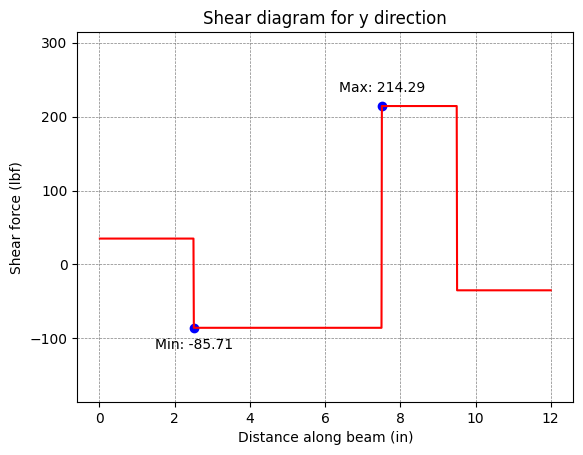

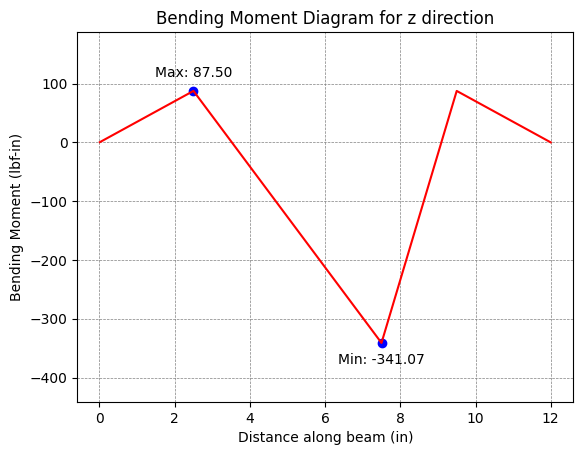

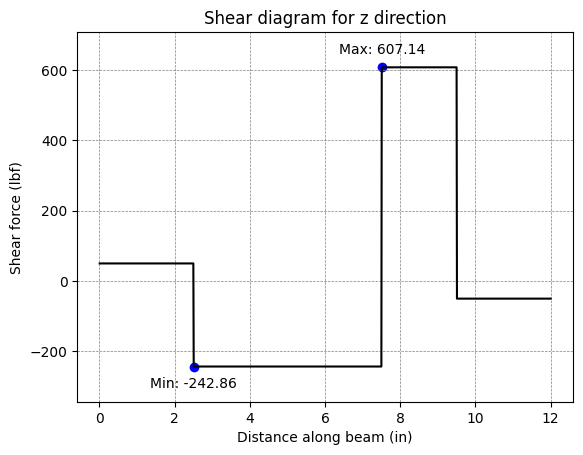

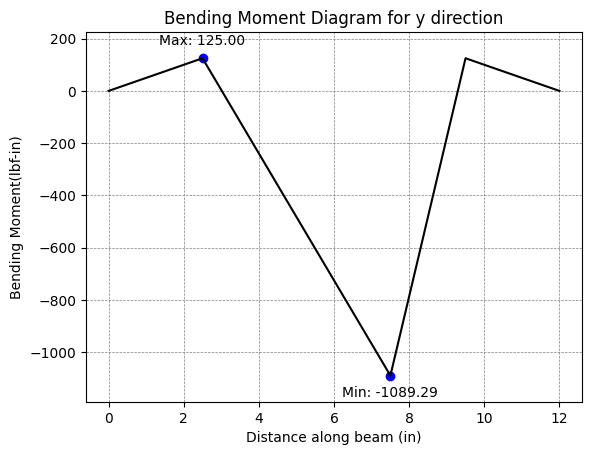

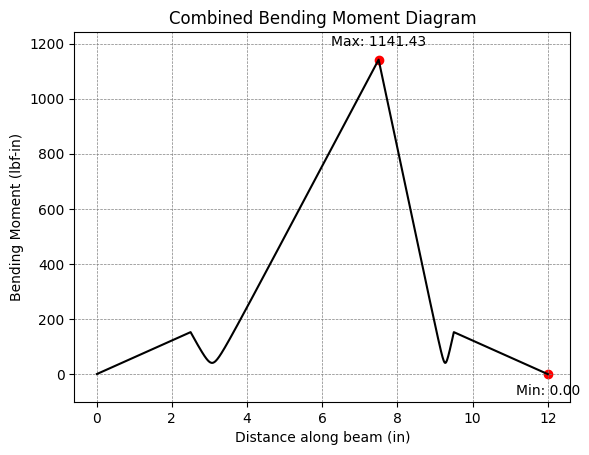

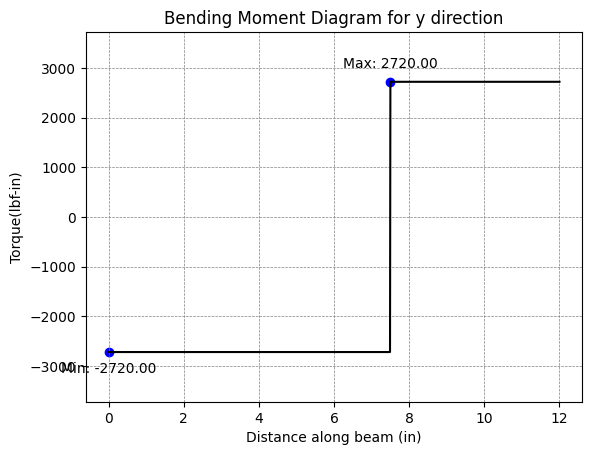

In [5]:
def setShear(x,dir):
    if 0.00<x<=2.50:
        return R1y if dir == 'y' else R1z
    elif 2.50<=x<=7.5:
        return R1y+B1y if dir=='y' else R1z+B1z
    elif 7.5<=x<=9.5:
        return R1y+B1y+W12y if dir=='y' else R1z+B1z+W12z
    elif x>=9.5:
        return R1y+B1y+W12y+B2y if dir=='y' else R1z+B1z+W12z+B2z
def setMoment(x,dir):
    if dir == 'z':
        if 0.00<x<=2.50:
            return R1y*x
        elif 2.50<x<=7.5:
            return R1y*(2.5) + (R1y+B1y)*(x-2.5) 
        elif 7.5<x<=9.5:
            return R1y*(2.5) + (R1y+B1y)*(7.5-2.5) + (R1y+B1y+W12y)*(x-7.5)
        elif x>=9.5:
            return R1y*(2.5) + (R1y+B1y)*(7.5-2.5) + (R1y+B1y+W12y)*(9.5-7.5)+ (R1y+B1y+W12y+B2y)*(x-9.5)
    else :
        if 0.00<=x<=2.50:
            return R1z*x
        elif 2.50<=x<=7.5:
            return R1z*(2.5) + (R1z+B1z)*(x-2.5) 
        elif 7.5<=x<=9.5:
            return R1z*(2.5) + (R1z+B1z)*(7.5-2.5) + (R1z+B1z+W12z)*(x-7.5)
        elif x>=9.5:
            return R1z*(2.5) + (R1z+B1z)*(7.5-2.5) + (R1z+B1z+W12z)*(9.5-7.5)+ (R1z+B1z+W12z+B2z)*(x-9.5)
        
def setTorque(x):
    if 0.00<=x<7.5:
        return -2720
    else: 
        return 2720

df['Vy'] = df['x_inches'].apply(setShear, dir='y')
df['Vz'] = df['x_inches'].apply(setShear, dir='z')
df['Mz'] = df['x_inches'].apply(setMoment, dir='z')
df['My'] = df['x_inches'].apply(setMoment, dir='y')
df['T'] = df['x_inches'].apply(setTorque)

# Find maxima and minima
max_Vy = df.loc[df['Vy'].idxmax()]
min_Vy = df.loc[df['Vy'].idxmin()]
max_Mz = df.loc[df['Mz'].idxmax()]
min_Mz = df.loc[df['Mz'].idxmin()]
max_Vz = df.loc[df['Vz'].idxmax()]
min_Vz = df.loc[df['Vz'].idxmin()]
max_My = df.loc[df['My'].idxmax()]
min_My = df.loc[df['My'].idxmin()]
max_T = df.loc[df['T'].idxmax()]
min_T = df.loc[df['T'].idxmin()]

# Plot Shear for y direction
plt.plot(df['x_inches'], df['Vy'], color='red')
plt.scatter([max_Vy['x_inches'], min_Vy['x_inches']], [max_Vy['Vy'], min_Vy['Vy']], color='blue')  # Add max and min points
plt.annotate(f'Max: {max_Vy["Vy"]:.2f}', (max_Vy['x_inches'], max_Vy['Vy']), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'Min: {min_Vy["Vy"]:.2f}', (min_Vy['x_inches'], min_Vy['Vy']), textcoords="offset points", xytext=(0, -15), ha='center')
plt.grid(True, color='grey', linewidth=0.5, linestyle='--')
plt.xlabel('Distance along beam (in)')
plt.ylabel('Shear force (lbf)')
# Adjust the y-axis limits for Shear for y direction
plt.ylim(df['Vy'].min() - 100, df['Vy'].max() + 100)
plt.title('Shear diagram for y direction')
plt.show()

# Plot Bending Moment for z direction
plt.plot(df['x_inches'], df['Mz'], color='red')
plt.scatter([max_Mz['x_inches'], min_Mz['x_inches']], [max_Mz['Mz'], min_Mz['Mz']], color='blue')  # Add max and min points
plt.annotate(f'Max: {max_Mz["Mz"]:.2f}', (max_Mz['x_inches'], max_Mz['Mz']), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'Min: {min_Mz["Mz"]:.2f}', (min_Mz['x_inches'], min_Mz['Mz']), textcoords="offset points", xytext=(0, -15), ha='center')
plt.grid(True, color='grey', linewidth=0.5, linestyle='--')
plt.xlabel('Distance along beam (in)')
plt.ylabel('Bending Moment (lbf-in)')
# Adjust the y-axis limits for Bending Moment for z direction
plt.ylim(df['Mz'].min() - 100, df['Mz'].max() + 100)
plt.title('Bending Moment Diagram for z direction')
plt.show()

# Plot Shear for z direction
plt.plot(df['x_inches'], df['Vz'], color='black')
plt.scatter([max_Vz['x_inches'], min_Vz['x_inches']], [max_Vz['Vz'], min_Vz['Vz']], color='blue')  # Add max and min points
plt.annotate(f'Max: {max_Vz["Vz"]:.2f}', (max_Vz['x_inches'], max_Vz['Vz']), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'Min: {min_Vz["Vz"]:.2f}', (min_Vz['x_inches'], min_Vz['Vz']), textcoords="offset points", xytext=(0, -15), ha='center')
plt.grid(True, color='grey', linewidth=0.5, linestyle='--')
plt.xlabel('Distance along beam (in)')
plt.ylabel('Shear force (lbf)')
# Adjust the y-axis limits for Shear for z direction
plt.ylim(df['Vz'].min() - 100, df['Vz'].max() + 100)
plt.title('Shear diagram for z direction')
plt.show()

# Plot Bending for y moment
plt.plot(df['x_inches'], df['My'], color='black')
plt.scatter([max_My['x_inches'], min_My['x_inches']], [max_My['My'], min_My['My']], color='blue')  # Add max and min points
plt.annotate(f'Max: {max_My["My"]:.2f}', (max_My['x_inches'], max_My['My']), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'Min: {min_My["My"]:.2f}', (min_My['x_inches'], min_My['My']), textcoords="offset points", xytext=(0, -15), ha='center')
plt.grid(True, color='grey', linewidth=0.5, linestyle='--')
plt.xlabel('Distance along beam (in)')
plt.ylabel('Bending Moment(lbf-in)')
# Adjust the y-axis limits for Torque
plt.ylim(df['My'].min() - 100, df['My'].max() + 100)
plt.title('Bending Moment Diagram for y direction')
plt.show()

#Plot Combine moment 
df['Mcombined'] = ((df['My'])**2 + (df['Mz'])**2)**0.5
# Find maxima and minima for combined bending moment
max_Mcombined = df.loc[df['Mcombined'].idxmax()]
min_Mcombined = df.loc[df['Mcombined'].idxmin()]
# Plot Combined Bending Moment
plt.plot(df['x_inches'], df['Mcombined'], color='black')
# Add max and min points
plt.scatter([max_Mcombined['x_inches'], min_Mcombined['x_inches']], [max_Mcombined['Mcombined'], min_Mcombined['Mcombined']], color='red')
# Annotate max and min points
plt.annotate(f'Max: {max_Mcombined["Mcombined"]:.2f}', (max_Mcombined['x_inches'], max_Mcombined['Mcombined']), textcoords="offset points", xytext=(0, 10), ha='center', color='black')
plt.annotate(f'Min: {min_Mcombined["Mcombined"]:.2f}', (min_Mcombined['x_inches'], min_Mcombined['Mcombined']), textcoords="offset points", xytext=(0, -15), ha='center', color='black')
# Other plot settings
plt.grid(True, color='grey', linewidth=0.5, linestyle='--')
plt.xlabel('Distance along beam (in)')
plt.ylabel('Bending Moment (lbf-in)')
# Adjust the y-axis limits for Combined Bending Moment
plt.ylim(df['Mcombined'].min() - 100, df['Mcombined'].max() + 100)
plt.title('Combined Bending Moment Diagram')
plt.show()

# Plot Bending for Torque
plt.plot(df['x_inches'], df['T'], color='black')
plt.scatter([max_T['x_inches'], min_T['x_inches']], [max_T['T'], min_T['T']], color='blue')  # Add max and min points
plt.annotate(f'Max: {max_T["T"]:.2f}', (max_T['x_inches'], max_T['T']), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'Min: {min_T["T"]:.2f}', (min_T['x_inches'], min_T['T']), textcoords="offset points", xytext=(0, -15), ha='center')
plt.grid(True, color='grey', linewidth=0.5, linestyle='--')
plt.xlabel('Distance along beam (in)')
plt.ylabel('Torque(lbf-in)')
# Adjust the y-axis limits for Torque
plt.ylim(df['T'].min() - 1000, df['T'].max() + 1000)
plt.title('Bending Moment Diagram for y direction')
plt.show()

In [ ]:
df2 = pd.DataFrame({'x_loc': np.array([3.75, 6.25,7.5, 8.75])})
df2['M'] = df2['x_loc'].apply(lambda x_ref: df.loc[df['x_inches'] == x_ref, 'Mcombined'].iloc[0])
df2['Ma'] = df2['M']
df2['Mm'] = df2['M']-df2['M']
df2['Ta'] = np.zeros_like(df2['x_loc'])
df2['Tm']= np.array([-2720.0,-2720.0,2720.0,2720.0])
df2.to_excel('partBP1.xlsx')

d2=2
D2 = 2.5
dfsigma = pd.DataFrame({'x_loc': np.array([3.75, 6.25, 7.5, 8.75])})
dfsigma['d'] = np.ones_like(dfsigma['x_loc'])*d2
dfsigma['siga'] = (32/(math.pi*dfsigma['d']**3))*df2['Ma']
dfsigma['sigm'] = (32/(math.pi*dfsigma['d']**3))*df2['Mm']
dfsigma['taua'] = (16/(math.pi*dfsigma['d']**3))*df2['Ta']
dfsigma['taum'] = (16/(math.pi*dfsigma['d']**3))*df2['Tm']

dfsigma['Kt']=np.array([2.5,2.5,2.14,2.45])
dfsigma['Kts']=np.array([1.85,1.85,3.00,1.75])
dfsigma['q']=np.ones_like(df2['x_loc'])*0.66
dfsigma['qs']=np.ones_like(df2['x_loc'])*0.72
dfsigma['Kf']= 1 + dfsigma['q']*(dfsigma['Kt']-1)
dfsigma['Kfs']= 1 + dfsigma['qs']*(dfsigma['Kts']-1)
dfsigma['sigm_vm'] = (((dfsigma['sigm'])*dfsigma['Kf'])**2 + 3*(dfsigma['taum']*dfsigma['Kfs'])**2)**(0.5)
dfsigma['siga_vm'] = (((dfsigma['siga'])*dfsigma['Kf'])**2 + 3*(dfsigma['taua']*dfsigma['Kfs'])**2)**(0.5)
dfsigma.to_excel('partBP2.xlsx')

dfMat= pd.DataFrame(df2['x_loc'])
dfMat['Sut']=np.ones_like(df2['x_loc'])*68
dfMat['SeExp']=dfMat['Sut']/2
dfMat['kb'] =  np.ones_like(df2['x_loc'])*0.816
dfMat['Se']= dfMat['SeExp']*0.800*dfMat['kb']
dfMat['nf'] = ((dfsigma['sigm_vm'])/(dfMat['Sut']*10**3) + (dfsigma['siga_vm'])/(dfMat['Se']*10**3))**-1
dfMat['ny'] = (57*10**3)/(((dfsigma['sigm_vm'])**2+ (dfsigma['siga_vm'])**2)**0.5)
dfMat.to_excel('partBP3.xlsx')


In [10]:
RB1=[-845.0/7,-2050/7]
RB2=[-1745.0/7,-4600/7]

FD1 = ((RB1[0])**2 + (RB1[1])**2)**0.5
FD2 = ((RB2[0])**2 + (RB2[1])**2)**0.5
print (FD1,FD2)

#Convert to kilo newtons
FD1 = FD1 * 4.44822/1000
FD2 = FD2 * 4.44822/1000
print(FD1,FD2)

t = 15000 * 60  ##Need to be changed
N = 1000 ##Needs to be changed

LR = 10**6
LD = N*t
a = 3
a1 = 1

FR1 = (FD1/a1)*((LD/LR)**(1/a))
FR2 = (FD2/a1)*((LD/LR)**(1/a))

print(FR1,FR2,LD)

316.7605482031485 702.837180320461
1.4090206057282093 3.126374402245081
13.603944375211803 30.184812976703967 900000000


In [1]:
T = 5440
n = 1.5
w = 1/2
h = 1/2
r = 2.0/2
Sy = 54*(10**3)

ltau = T*n/(0.577*Sy*r*w)
lc = 2*T*n/(Sy*r*h)

print (ltau,lc)

0.523782014249952 0.6044444444444445
